# Study of Variable Stars

In this notebook, we study the variability of the star _RR Lyrae_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle as lsg

In [2]:
data = np.genfromtxt('anonymous1619179984702__1.csv', delimiter=',')

In [3]:
data[0]

array([5.87012381e+18, 1.68159666e+16,            nan, 1.70095078e+03,
       1.47246884e+01, 2.42924289e+04, 9.85806006e+01, 2.46422000e+02,
                  nan,            nan, 4.09700000e+03, 3.69295550e+17])

In [4]:
time, flx, flx_err, mag = data[:,3], data[:,5], data[:,6], data[:,4]
print(len(flx))

61


In [5]:
mag_err = 1.086*flx_err/flx

In [6]:
c0 = mag + 2.5*np.log10(flx)
print(c0)

[25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573 25.68836573
 25.68836573]


In [7]:
# Un-weighted mean, median: Flux

mn_fl, md_fl = np.average(flx), np.median(flx)
print(mn_fl)
print(md_fl)

31621.358221995797
29101.7309006603


In [8]:
# Weighted mean: Flux

mn_fl_wt = np.average(flx, weights=flx_err**-2)
print(mn_fl_wt)

11609.812992830106


In [9]:
# Un-weighted mean, median: magnitude

mn_mg, md_mg = np.mean(mag), np.median(mag)
print(mn_mg)
print(md_mg)

14.806319684034769
14.5285686737673


In [10]:
# Weighted mean: magnitude

mn_mag_mg = np.average(mag, weights=mag_err**-2)
print(mn_mag_mg)

14.335691638811488


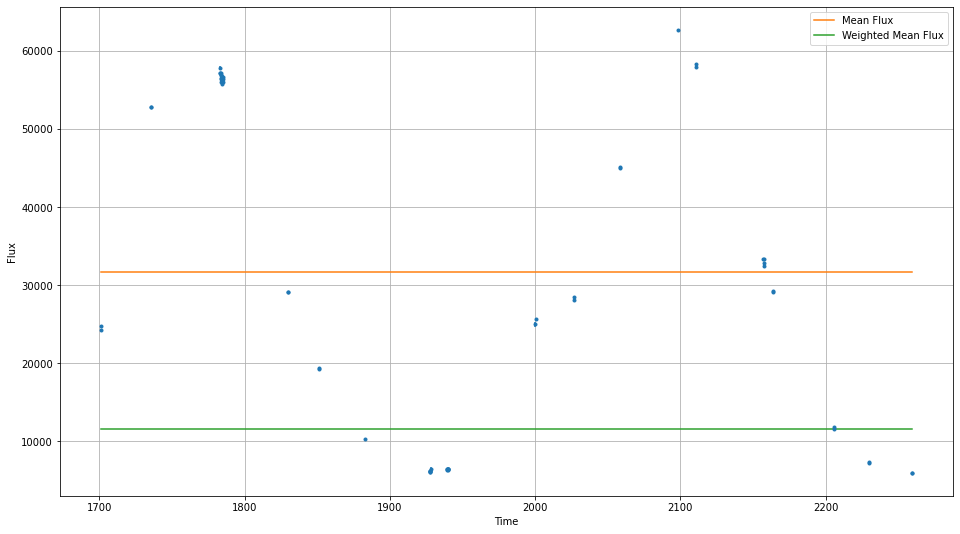

In [11]:
plt.figure(figsize=(16,9))
plt.errorbar(time, flx, yerr=flx_err, fmt='.')
plt.plot(time, mn_fl*np.ones(len(flx)), label='Mean Flux')
plt.plot(time, mn_fl_wt*np.ones(len(flx)), label='Weighted Mean Flux')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend(loc='best')
plt.grid()

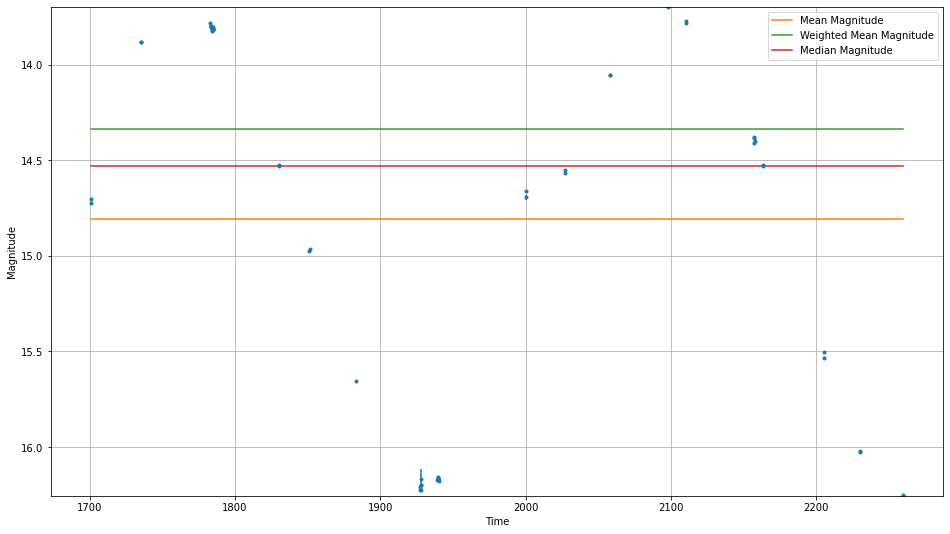

In [12]:
plt.figure(figsize=(16,9))
plt.errorbar(time, mag, yerr=mag_err, fmt='.')
plt.plot(time, mn_mg*np.ones(len(flx)), label='Mean Magnitude')
plt.plot(time, mn_mag_mg*np.ones(len(flx)), label='Weighted Mean Magnitude')
plt.plot(time, md_mg*np.ones(len(flx)), label='Median Magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend(loc='best')
plt.ylim([np.max(mag), np.min(mag)])
plt.grid()

In [13]:
num_obs = 15
flux_true = 10

In [14]:
poi_flx = np.random.poisson(flux_true, num_obs)
poi_flx

array([ 9, 12, 14, 11, 18, 10,  7,  9, 15,  8, 12, 13,  9,  8,  7])

In [15]:
poi_flx_err = poi_flx**0.5

In [16]:
np.average(poi_flx)

10.8

In [17]:
np.average(poi_flx, weights=poi_flx_err**-2)

10.018719997034458

In [18]:
means = np.zeros(10000)
wht_means = np.zeros(10000)
med_flx = np.zeros(10000)

for i in range(len(means)):
    poi_flxs = np.random.poisson(flux_true, num_obs)
    poi_flxs_err = poi_flxs**0.5
    means[i] = np.average(poi_flxs)
    med_flx[i] = np.median(poi_flxs)
    wht_means[i] = np.average(poi_flxs, weights=poi_flxs_err**-2)

/home/jayshil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/jayshil/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:422: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


/home/jayshil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jayshil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


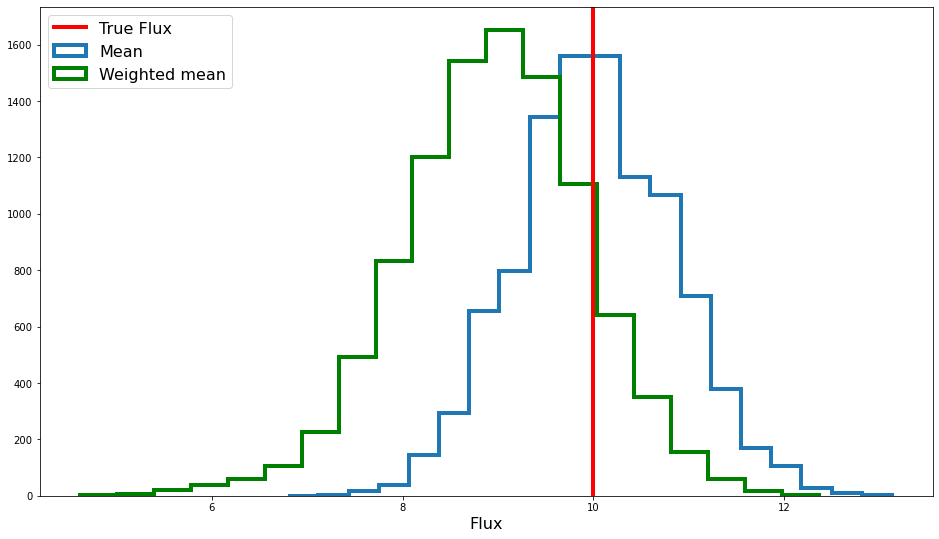

In [19]:
plt.figure(figsize=(16,9))
plt.hist(means, bins=20, histtype='step', linewidth=4, label='Mean')
plt.hist(wht_means, bins=20, histtype='step', color='g', linewidth=4, label='Weighted mean')
plt.axvline(10, c='r', label='True Flux', linewidth=4)
plt.xlabel('Flux', fontsize=16)
plt.legend(fontsize=16, loc='best')
plt.show()

In [20]:
help(lsg)

Help on function lombscargle in module scipy.signal.spectral:

lombscargle(x, y, freqs, precenter=False, normalize=False)
    lombscargle(x, y, freqs)
    
    Computes the Lomb-Scargle periodogram.
    
    The Lomb-Scargle periodogram was developed by Lomb [1]_ and further
    extended by Scargle [2]_ to find, and test the significance of weak
    periodic signals with uneven temporal sampling.
    
    When *normalize* is False (default) the computed periodogram
    is unnormalized, it takes the value ``(A**2) * N/4`` for a harmonic
    signal with amplitude A for sufficiently large N.
    
    When *normalize* is True the computed periodogram is normalized by
    the residuals of the data around a constant reference model (at zero).
    
    Input arrays should be one-dimensional and will be cast to float64.
    
    Parameters
    ----------
    x : array_like
        Sample times.
    y : array_like
        Measurement values.
    freqs : array_like
        Angular frequencies fo

In [23]:
freq = 2*np.pi/np.linspace(1,365*5,10000)

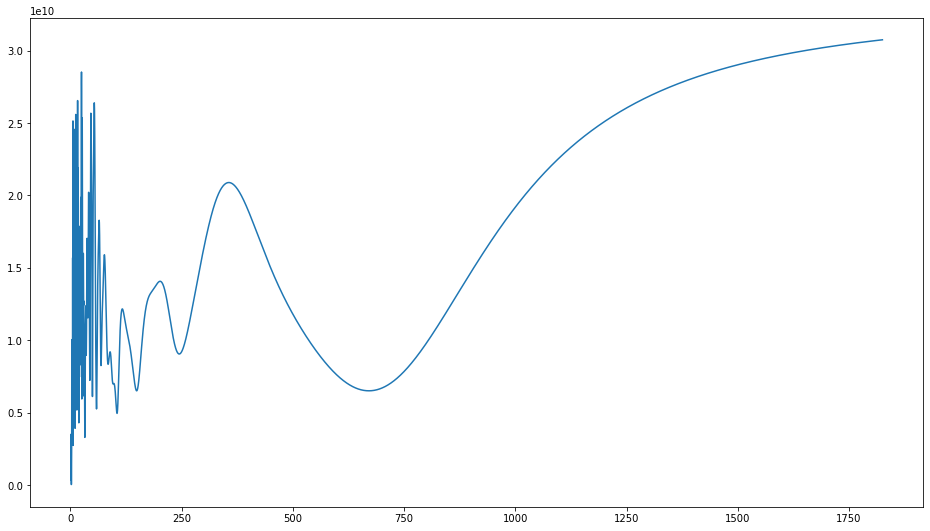

In [24]:
plt.figure(figsize=(16,9))
plt.plot(2*np.pi/freq, lsg(time, flx, freq))